In [2]:
import locale
locale.setlocale(locale.LC_ALL, '')

import matplotlib as mpl
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})
mpl.rcParams.update({'mathtext.fontset':'dejavusans'})
mpl.rcParams['axes.formatter.use_locale'] = True

dict_simbolos = {'Água':'o',
                 'Sacarose':'s',
                 'Glicerina':'<',
                 'DMSO':'>',
                 '1,3BD':'^',
                 'Ureia':'v'}

import matplotlib.pyplot as plt
import pandas as pd
import glob
import numpy as np
import matplotlib as mpl
import os
import re

from matplotlib.offsetbox import AnchoredText
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit, Model

In [3]:
files = glob.glob('*.csv')
find_conc = re.compile(r'\d\d\d?')
files.sort(key = lambda x: int(find_conc.search(x).group()))
files
#colnames = ['n', 'GP', 'Eta', 'omega', "G1", "G2", 'T', 'Tau']
#for file in files:
#    temp_pd = pd.read_csv(file, encoding='utf8', delimiter=';', decimal=',')
#    files_pd.append(temp_pd)

['OF_RH35-2.csv',
 'OF_RH35.csv',
 'OF_RH60.csv',
 'OF_RG72.csv',
 'OF_RH100.csv',
 'OF_RH189-2.csv',
 'OF_RH189-3.csv',
 'OF_RH189.csv',
 'OF_RH260.csv',
 'OF_RH365-2.csv',
 'OF_RH365.csv']

# Plotando todos em um gráfico só

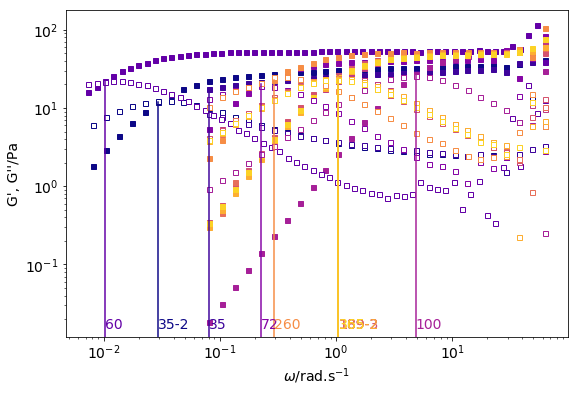

In [4]:
#concs = []
cores = plt.cm.plasma(np.arange(0, len(files))/len(files))

padrao_osc = {'linewidth':0, 'marker':'s', 'markersize':5}
find_conc = re.compile(r'\d\d\d?-?\d?')

fig, ax = plt.subplots(1, 1, figsize=(9,6))
for i, file in enumerate(files):
    c = find_conc.search(file).group()
    df = pd.read_csv(file, encoding='utf8', delimiter=';', decimal=',', names = ['w', 'G1', 'G2', 'T'], header=1)
    ax.plot('w', 'G1', data=df, label= f"G'" + c, **padrao_osc, color=cores[i])

for i, file in enumerate(files):
    c = find_conc.search(file).group()
    df = pd.read_csv(file, encoding='utf8', delimiter=';', decimal=',', names = ['w', 'G1', 'G2', 'T'], header=1)
    ax.plot('w', 'G2', data=df, label= f"G''" + c, **padrao_osc, color=cores[i], markerfacecolor='w')

    
ax.set(xlabel=r'$\omega$/rad.s$^{-1}$', ylabel="G', G''/Pa", xscale='log', yscale='log')
#ax.legend(ncol=2, fontsize='small')

for i, file in enumerate(files):
    c = find_conc.search(file).group()
    df = pd.read_csv(file, encoding='utf8', delimiter=';', decimal=',', names = ['w', 'G1', 'G2', 'T'], header=1)
        
    i_cruz = np.abs(np.log10(df['G1']) - np.log10(df['G2'])).idxmin()  
    y_cruz = df.loc[i_cruz, 'G1']
    x_cruz = df.loc[i_cruz, 'w']
    
    a = ax.transData.transform((x_cruz, y_cruz))
    b = ax.transAxes.inverted().transform(a)
    
    ymin, ymax = ax.get_ylim()
    rel_cruz = (np.log10(y_cruz) - ymin) / (ymax - ymin)
    
    ax.axvline(x=x_cruz, ymin=0, ymax=b[1], color=cores[i])
    ax.text(x=x_cruz, y=0.015, s=c, color=cores[i])

# Vendo a diferença entre os 189

In [5]:
f189 = [i for i in files if '189' in i]
f189

['OF_RH189-2.csv', 'OF_RH189-3.csv', 'OF_RH189.csv']

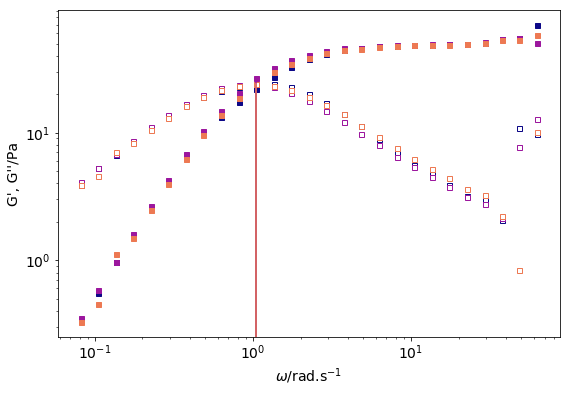

In [6]:
#concs = []
cores = plt.cm.plasma(np.arange(0, len(f189))/len(f189))

padrao_osc = {'linewidth':0, 'marker':'s', 'markersize':5}
find_conc = re.compile(r'\d\d\d?-?\d?')

fig, ax = plt.subplots(1, 1, figsize=(9,6))
for i, file in enumerate(f189):
    c = find_conc.search(file).group()
    df = pd.read_csv(file, encoding='utf8', delimiter=';', decimal=',', names = ['w', 'G1', 'G2', 'T'], header=1)
    ax.plot('w', 'G1', data=df, label= f"G'" + c, **padrao_osc, color=cores[i])

for i, file in enumerate(f189):
    c = find_conc.search(file).group()
    df = pd.read_csv(file, encoding='utf8', delimiter=';', decimal=',', names = ['w', 'G1', 'G2', 'T'], header=1)
    ax.plot('w', 'G2', data=df, label= f"G''" + c, **padrao_osc, color=cores[i], markerfacecolor='w')

    
ax.set(xlabel=r'$\omega$/rad.s$^{-1}$', ylabel="G', G''/Pa", xscale='log', yscale='log')
#ax.legend(ncol=2, fontsize='small')

for i, file in enumerate(f189):
    c = find_conc.search(file).group()
    df = pd.read_csv(file, encoding='utf8', delimiter=';', decimal=',', names = ['w', 'G1', 'G2', 'T'], header=1)
        
    i_cruz = np.abs(np.log10(df['G1']) - np.log10(df['G2'])).idxmin()  
    y_cruz = df.loc[i_cruz, 'G1']
    x_cruz = df.loc[i_cruz, 'w']
    
    a = ax.transData.transform((x_cruz, y_cruz))
    b = ax.transAxes.inverted().transform(a)
    
    ymin, ymax = ax.get_ylim()
    rel_cruz = (np.log10(y_cruz) - ymin) / (ymax - ymin)
    
    ax.axvline(x=x_cruz, ymin=0, ymax=b[1], color=cores[i])

Aparentemente não há diferença entre esses 3

# Vendo a diferença entre os 365

In [7]:
f365 = [i for i in files if '365' in i]
f365

['OF_RH365-2.csv', 'OF_RH365.csv']

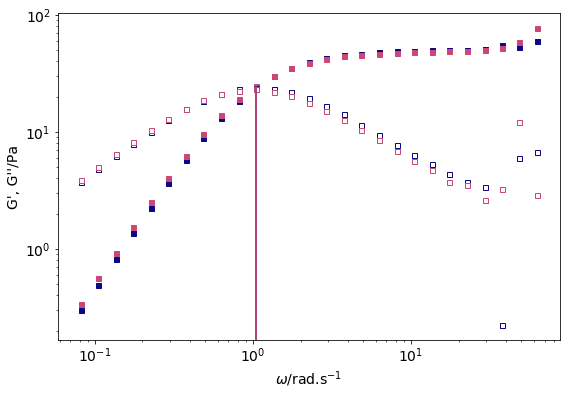

In [8]:
#concs = []
cores = plt.cm.plasma(np.arange(0, len(f365))/len(f365))

padrao_osc = {'linewidth':0, 'marker':'s', 'markersize':5}
find_conc = re.compile(r'\d\d\d?-?\d?')

fig, ax = plt.subplots(1, 1, figsize=(9,6))
for i, file in enumerate(f365):
    c = find_conc.search(file).group()
    df = pd.read_csv(file, encoding='utf8', delimiter=';', decimal=',', names = ['w', 'G1', 'G2', 'T'], header=1)
    ax.plot('w', 'G1', data=df, label= f"G'" + c, **padrao_osc, color=cores[i])

for i, file in enumerate(f365):
    c = find_conc.search(file).group()
    df = pd.read_csv(file, encoding='utf8', delimiter=';', decimal=',', names = ['w', 'G1', 'G2', 'T'], header=1)
    ax.plot('w', 'G2', data=df, label= f"G''" + c, **padrao_osc, color=cores[i], markerfacecolor='w')

    
ax.set(xlabel=r'$\omega$/rad.s$^{-1}$', ylabel="G', G''/Pa", xscale='log', yscale='log')
#ax.legend(ncol=2, fontsize='small')

for i, file in enumerate(f365):
    c = find_conc.search(file).group()
    df = pd.read_csv(file, encoding='utf8', delimiter=';', decimal=',', names = ['w', 'G1', 'G2', 'T'], header=1)
        
    i_cruz = np.abs(np.log10(df['G1']) - np.log10(df['G2'])).idxmin()  
    y_cruz = df.loc[i_cruz, 'G1']
    x_cruz = df.loc[i_cruz, 'w']
    
    a = ax.transData.transform((x_cruz, y_cruz))
    b = ax.transAxes.inverted().transform(a)
    
    ymin, ymax = ax.get_ylim()
    rel_cruz = (np.log10(y_cruz) - ymin) / (ymax - ymin)
    
    ax.axvline(x=x_cruz, ymin=0, ymax=b[1], color=cores[i])

# Plotando somente com os dados bons

In [9]:
files
fbons = [i for i in files if '35-2' in i or '60' in i or '72' in i or '189-3' in i or '365-2' in i or '100' in i]
fbons

['OF_RH35-2.csv',
 'OF_RH60.csv',
 'OF_RG72.csv',
 'OF_RH100.csv',
 'OF_RH189-3.csv',
 'OF_RH260.csv',
 'OF_RH365-2.csv']

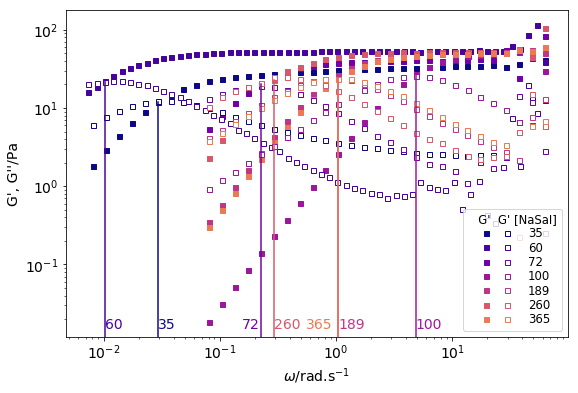

In [169]:
lines_g1 = []
lines_g2 = []
cs = []
cores = plt.cm.plasma(np.arange(0, len(fbons)) / (len(fbons) + 2))

padrao_osc = {'linewidth':0, 'marker':'s', 'markersize':5}
find_conc = re.compile(r'\d\d\d?')

fig, ax = plt.subplots(1, 1, figsize=(9,6))
for i, file in enumerate(fbons):
    c = find_conc.search(file).group()
    df = pd.read_csv(file, encoding='utf8', delimiter=';', decimal=',', names = ['w', 'G1', 'G2', 'T'], header=1)
    l = ax.plot('w', 'G1', data=df, label="G'", **padrao_osc, color=cores[i]) #, label= f"G'" + c
    lines_g1.append(l[0])

for i, file in enumerate(fbons):
    c = find_conc.search(file).group()
    df = pd.read_csv(file, encoding='utf8', delimiter=';', decimal=',', names = ['w', 'G1', 'G2', 'T'], header=1)
    l = ax.plot('w', 'G2', data=df, label= f"G''" + c, **padrao_osc, color=cores[i], markerfacecolor='w')
    lines_g2.append(l[0])
    cs.append(c)

ax.set(xlabel=r'$\omega$/rad.s$^{-1}$', ylabel="G', G''/Pa", xscale='log', yscale='log')

for i, file in enumerate(fbons):
    c = find_conc.search(file).group()
    df = pd.read_csv(file, encoding='utf8', delimiter=';', decimal=',', names = ['w', 'G1', 'G2', 'T'], header=1)
        
    i_cruz = np.abs(np.log10(df['G1']) - np.log10(df['G2'])).idxmin()  
    y_cruz = df.loc[i_cruz, 'G1']
    x_cruz = df.loc[i_cruz, 'w']
    
    a = ax.transData.transform((x_cruz, y_cruz))
    b = ax.transAxes.inverted().transform(a)
    
    ymin, ymax = ax.get_ylim()
    rel_cruz = (np.log10(y_cruz) - ymin) / (ymax - ymin)
    
    ax.axvline(x=x_cruz, ymin=0, ymax=b[1], color=cores[i])
    if c == '365':
        ax.text(x=x_cruz-0.5, y=0.015, s=c, color=cores[i])
    elif c == '72':
        ax.text(x=x_cruz-0.07, y=0.015, s=c, color=cores[i])
    else:
        ax.text(x=x_cruz, y=0.015, s=c, color=cores[i])
    
#ax.legend(ncol=2, fontsize='small')
ax.legend(lines_g1+lines_g2, ['']*len(fbons) + cs , ncol=2, title="   G'  G' [NaSal]",  
          labelspacing=0.2, columnspacing=-1, title_fontsize='small', fontsize='small', loc='lower right')

fig.savefig(r'../../../../reologia/oscilatório_água.pdf')

# Realizando os ajustes

## Plotando com os números

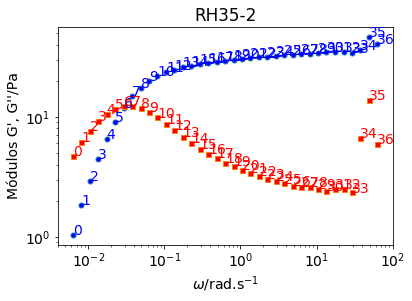

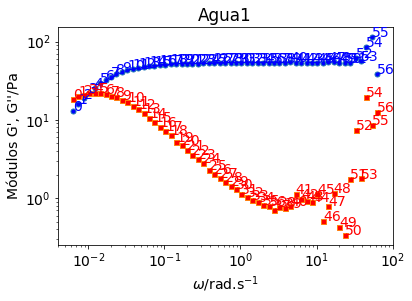

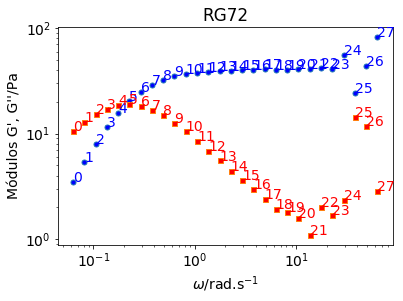

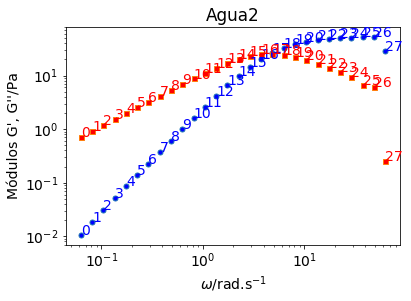

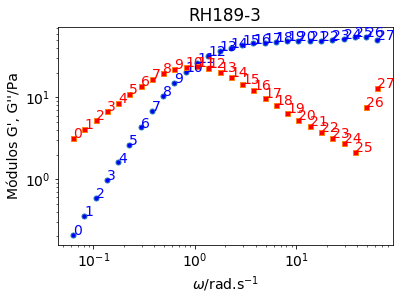

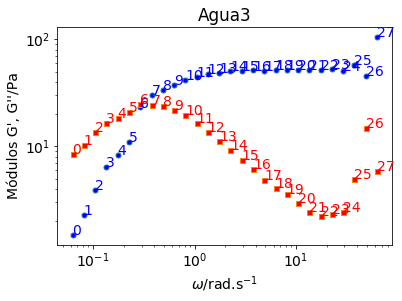

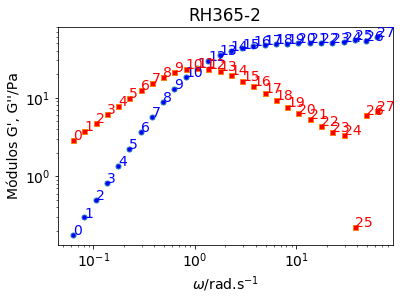

In [11]:
files_pd = []

for file in fbons:
    temp_pd = pd.read_csv(file, encoding='utf8', delimiter=';', decimal=',')
    files_pd.append(temp_pd)
    
for file in files_pd:
    wnum = 0
    G1num = 0
    G2num = 0
    
    wname = ''
    G1name = ''
    G2name = ''
    for i, col in enumerate(file.columns):
        if 'w' in col:
            wnum = i
            wname = col
        elif 'G1' in col:
            G1num = i
            G1name = col
        elif 'G2' in col:
            G2num = i
            G2name = col

    name = G1name.split(' ')[0]

    fig, ax = plt.subplots(ncols=1, nrows=1) #plt.gca().clear()
    ax.plot(file[wname], file[G1name], linewidth=0, marker='o', markerfacecolor='blue', markersize=5)
    ax.plot(file[wname], file[G2name], linewidth=0, marker='s', markerfacecolor='red', markersize=5)
    
    for i, val in enumerate(file[G1name]):
        ax.text(file[wname].iloc[i], file[G1name].iloc[i], str(i), color='blue')
        ax.text(file[wname].iloc[i], file[G2name].iloc[i], str(i), color='red')

    ax.set(xscale='log', yscale='log', xlabel='$\omega$/rad.s$^{-1}$', ylabel="Módulos G', G''/Pa")
    plt.title(name)

In [12]:
ptos = {'35':33, '60':35, '72':21, '100':26, '189':25, '260':22, '365':24}

## Realizando os ajustes

In [13]:
def oldroydB_elast(w, Gn0, tau_r):
    return Gn0 * w ** 2 * tau_r ** 2 / (1 + w ** 2 * tau_r ** 2)  

def oldroydB_visc(w, Gn0, tau_r, eta_inf):
    return Gn0 * w * tau_r / (1 + w ** 2 * tau_r ** 2) + eta_inf * w    # correto! Tese Calabrese

###############################

def jeffreys_elast(w, eta0, lambda1, lambda2):
    return eta0 * (lambda1 - lambda2) * w ** 2 / (1 + lambda1 ** 2 * w ** 2)
    
    
def jeffreys_visc(w, eta0, lambda1, lambda2):
    return eta0 * (1 + lambda1 * lambda2 * w ** 2) * w / (1 + lambda1 ** 2 * w ** 2)

###############################

def jeffreys_elast2(w, G0, lambda0, lambdaj):
    return ((G0 * lambda0 * (lambda0 - lambdaj) * w ** 2 
           / (1 + lambda0 ** 2 * w ** 2)))
    
    
def jeffreys_visc2(w, G0, lambda0, lambdaj):
    return (G0 * lambda0 * (1 + lambda0 * lambdaj * w ** 2) 
                        * w / (1 + lambda0 ** 2 * w ** 2))
    
###############################

def two_mode_elast(w, G01, G02, lambda1, lambda2):
    return (( G01 * (lambda1 * w) ** 2 / (1 + (lambda1 * w) ** 2) ) 
         + ( G02 * (lambda2 * w) ** 2 / (1 + (lambda2 * w) ** 2) ))
    
def two_mode_visc(w, G01, G02, lambda1, lambda2):
    return (( G01 * (lambda1 * w) / (1 + (lambda1 * w) ** 2) ) 
         + ( G02 * (lambda2 * w) / (1 + (lambda2 * w) ** 2) ))
    
###############################
def maxwell_elast(w, G0, lambda1):
    return G0 * (lambda1 * w) ** 2 / (1 + (lambda1 * w) ** 2)
    
def maxwell_visc(w, G0, lambda1):
    return G0 * (lambda1 * w)      / (1 + (lambda1 * w) ** 2)

# Simplificando os parâmetros, removendo os parâmetros possivelmente supérfluos
def residual(params, x, datasets):
    model_elast = maxwell_elast(x, params['G0'], params['tr'])
    model_visc  = maxwell_visc (x, params['G0'], params['tr'])
    
    resid1 = datasets[0] - model_elast
    resid2 = datasets[1] - model_visc
    return np.concatenate((resid1, resid2))

def residual_oldroyd(params, x, datasets):
    model_elast = oldroydB_elast(x, params['G0'], params['tr'])
    model_visc  = oldroydB_visc(x, params['G0'], params['tr'], params['eta_inf'])
    
    resid1 = datasets[0] - model_elast
    resid2 = datasets[1] - model_visc
    return np.concatenate((resid1, resid2))

def residual_log(params, x, datasets):
    model_elast = np.log10(maxwell_elast(x, params['G0'], params['tr']))
    model_visc  = np.log10(maxwell_visc (x, params['G0'], params['tr']))
    
    resid1 = np.log10(datasets[0]) - model_elast
    resid2 = np.log10(datasets[1]) - model_visc
    return np.concatenate((resid1, resid2))

def residual_oldroyd_log(params, x, datasets):
    model_elast = np.log10(oldroydB_elast(x, params['G0'], params['tr']))
    model_visc  = np.log10(oldroydB_visc(x, params['G0'], params['tr'], params['eta_inf']))
    
    resid1 = np.log10(datasets[0]) - model_elast
    resid2 = np.log10(datasets[1]) - model_visc
    return np.concatenate((resid1, resid2))

def residual_jeffreys(params, x, datasets):
    jeff_elast = jeffreys_elast2(x, params['G0'], params['lambda1'], params['lambda2'])
    jeff_visc  = jeffreys_visc2 (x, params['G0'], params['lambda1'], params['lambda2'])

    resid1 = datasets[0] - jeff_elast
    resid2 = datasets[1] - jeff_visc
    return np.concatenate((resid1, resid2))

def residual_two_mode(params, x, datasets):
    tm_elast = two_mode_elast(x, params['G0_1'], params['G0_2'], params['lambda1'], params['lambda2'])
    tm_visc  = two_mode_visc (x, params['G0_1'], params['G0_2'], params['lambda1'], params['lambda2'])

    resid1 = datasets[0] - tm_elast
    resid2 = datasets[1] - tm_visc

    return np.concatenate((resid1, resid2))

In [53]:
from collections import namedtuple

resultado_ajuste = namedtuple('Resultados', ['conc', 'params', 'param_errs', 'R2', 'R2lin'])

### Maxwell

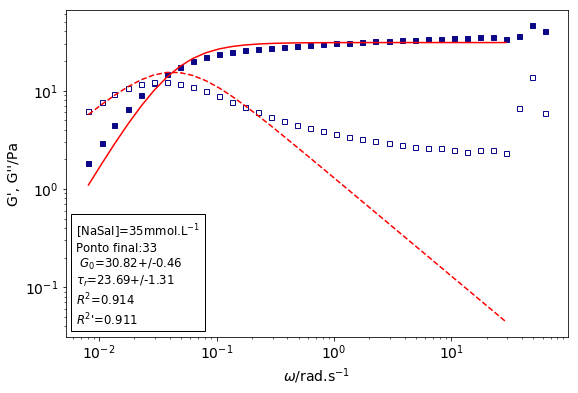

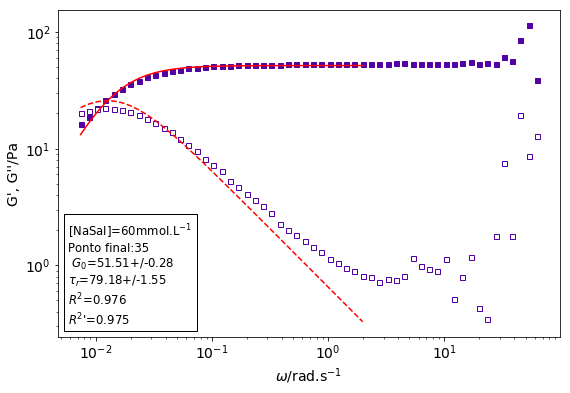

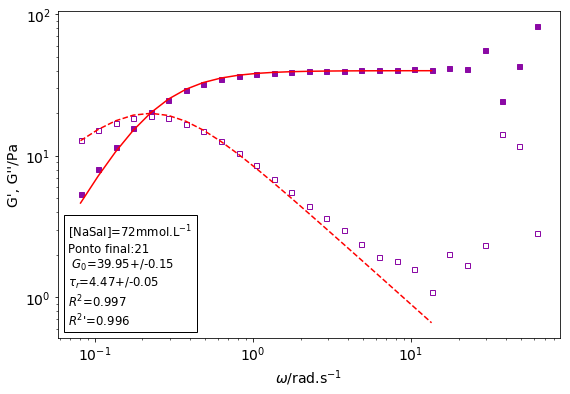

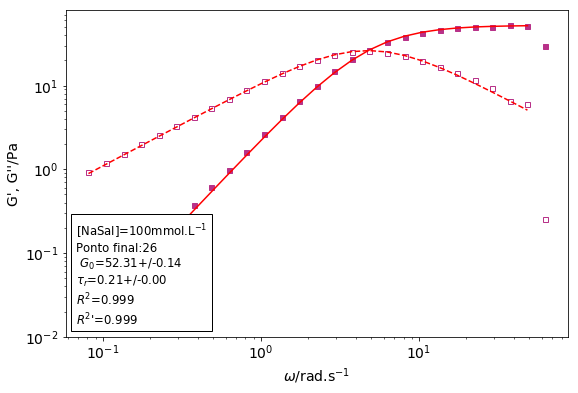

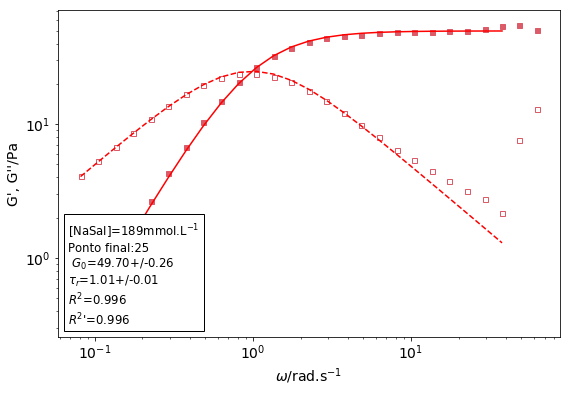

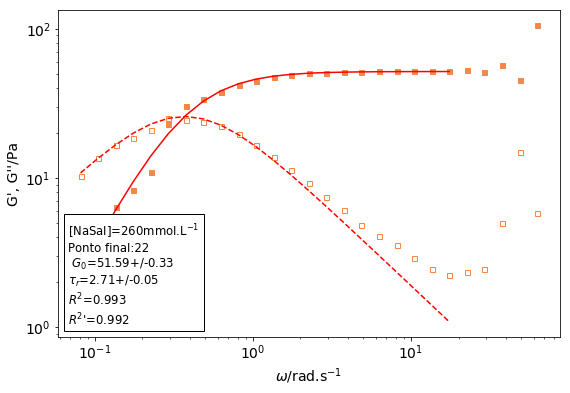

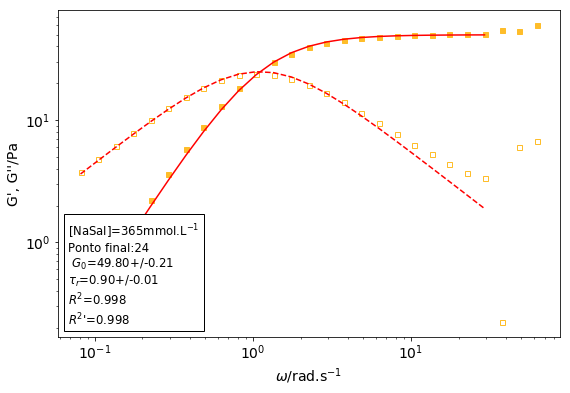

In [54]:
cores = plt.cm.plasma(np.arange(0, len(fbons))/len(fbons))
resultados_maxwell = []

with open('ajuste_maxwell.csv', 'w') as fhand:
    fhand.write('c;pto_final;g0;g0err;tr;trerr;R2;R2lin\n')
    
for file in fbons:
    temp_pd = pd.read_csv(file, encoding='utf8', delimiter=';', decimal=',')
    files_pd.append(temp_pd)
    
for i, file in enumerate(fbons):
    
    df = pd.read_csv(file, encoding='utf8', delimiter=';', decimal=',', 
                     names = ['w', 'G1', 'G2', 'T'], header=1)
    c = find_conc.search(file).group()
    
    params = Parameters()
    params.add('G0',          10., vary=True, min=0)
    params.add('tr',          1. , vary=True, min=0)
    
    final = ptos[c]
    
    dataset_x = df['w'].iloc[0:final]
    dataset_elast = df['G1'].iloc[0:final]
    dataset_visc = df['G2'].iloc[0:final]

    datasets = [dataset_elast, dataset_visc]
    fit = minimize( residual, params, args=(dataset_x, datasets) )

    SStot_elast = sum((dataset_elast - np.mean(dataset_elast)) ** 2)
    SStot_visc = sum((dataset_visc - np.mean(dataset_visc)) ** 2)

    G0_fit = fit.params['G0']
    tr_fit = fit.params['tr']

    modelo_elast = maxwell_elast(dataset_x, G0_fit, tr_fit)
    modelo_visc = maxwell_visc(dataset_x, G0_fit, tr_fit)

    SSres = fit.chisqr
    SStot = SStot_elast + SStot_visc
    R2 = 1 - SSres / SStot
    
    MQres = SSres/(final - 2)
    MQTcor = SStot/(final-1)
    R2lin = 1 - MQres/MQTcor

####################################
    
    fig, ax = plt.subplots(1, 1, figsize=(9,6))
    
    ax.set(xlabel=r'$\omega$/rad.s$^{-1}$', ylabel="G', G''/Pa", xscale='log', yscale='log')

    #l = ax.plot('w', 'G2', data=df, label= f"G''" + c, **padrao_osc, color=cores[i], markerfacecolor='w')
    #padrao_osc = {'linewidth':0, 'marker':'s', 'markersize':5}
    
    ax.plot(df['w'], df['G1'], **padrao_osc, color=cores[i], label='')
    ax.plot(df['w'], df['G2'], **padrao_osc, color=cores[i], markerfacecolor='w', label=c)
    ax.plot(dataset_x, modelo_elast, c='red')
    ax.plot(dataset_x, modelo_visc, 'r--')

    ax.set(xlabel=r'$\omega$/rad.s$^{-1}$', ylabel="G', G''/Pa", xscale='log', yscale='log')

    total_text= (rf'[NaSal]={c}' 
                 'mmol.L$^{-1}$'
                 '\n'
                rf'Ponto final:{final}'
                '\n' 
                rf' $G_0$={G0_fit.value:.2f}+/-{G0_fit.stderr:.2f}'
                '\n'
                rf'$\tau_r$={tr_fit.value:.2f}+/-{tr_fit.stderr:.2f}' 
                '\n' 
                rf'$R^2$={R2:.3f}'
                '\n'
                rf"$R^2$'={R2lin:.3f}")

    anchored_text = AnchoredText(total_text, loc=3, frameon=True, prop={'fontsize':'small'}, )
    ax.add_artist(anchored_text)
    
    with open('ajuste_maxwell.csv', 'a') as fhand:
        fhand.write(
                rf'{c}'
                 ';'
                rf'{final}'
                ';' 
                rf'{G0_fit.value};{G0_fit.stderr}'
                ';'
                rf'{tr_fit.value};{tr_fit.stderr}' 
                ';' 
                rf'{R2:.3f}'
                ';'
                rf"{R2lin:.3f}"
                '\n'
        )
    
    resultado = resultado_ajuste(c, [G0_fit.value, tr_fit.value], [G0_fit.stderr, tr_fit.stderr],
                                R2, R2lin)
    resultados_maxwell.append(resultado)

### Oldroyd

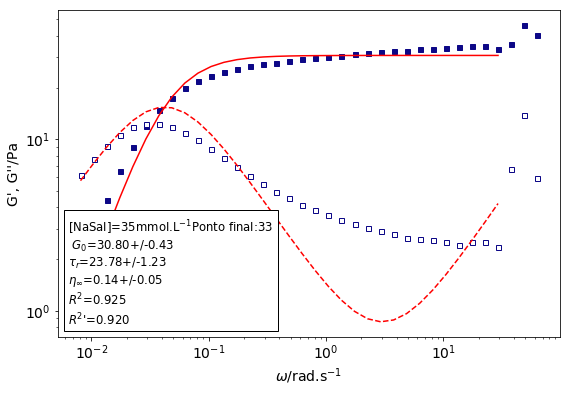

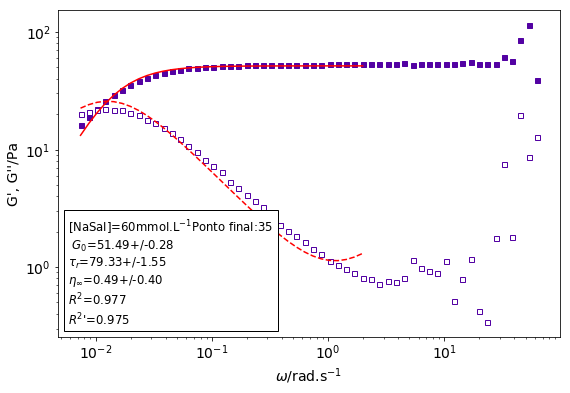

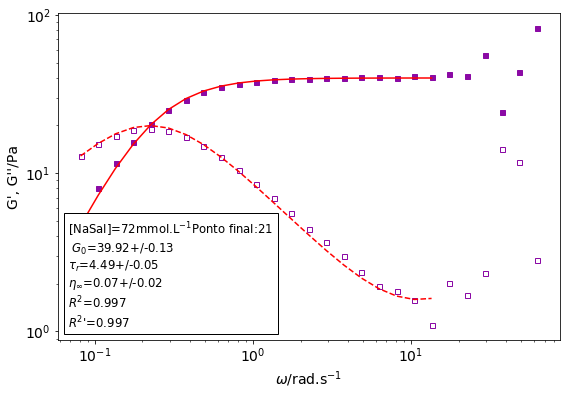

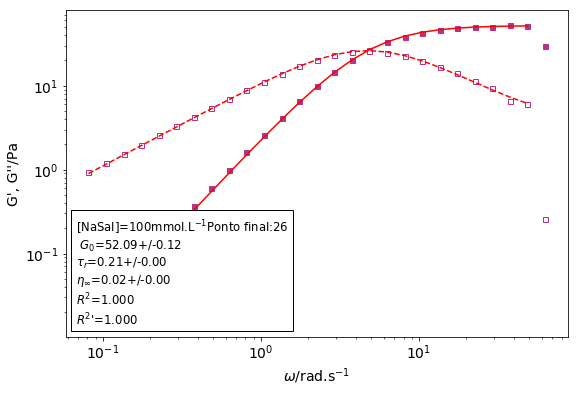

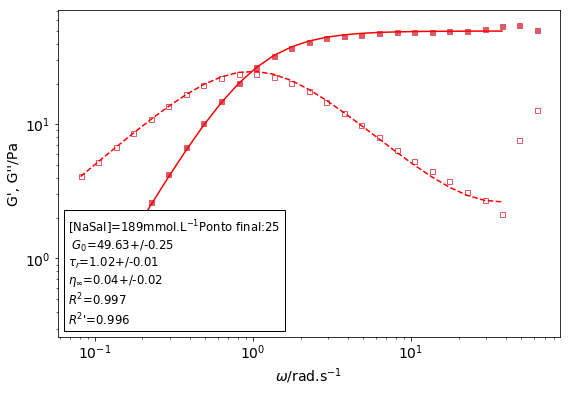

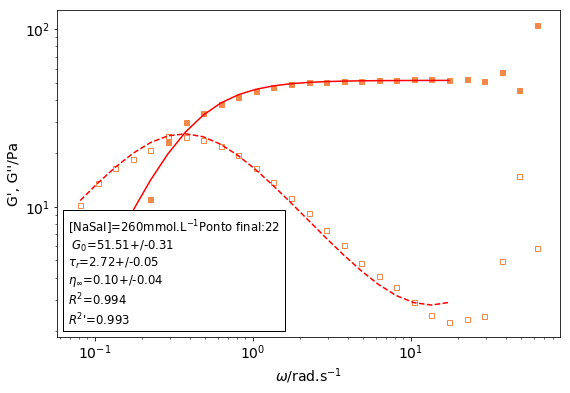

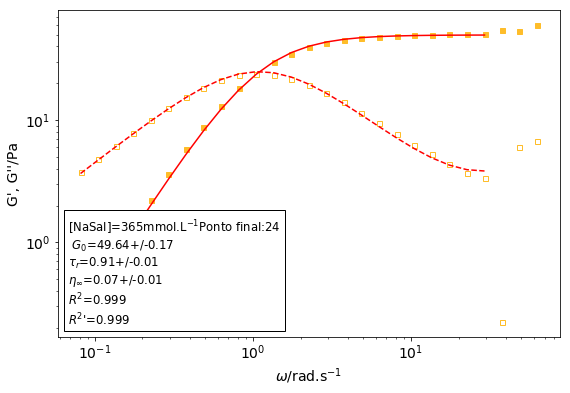

In [157]:
cores = plt.cm.plasma(np.arange(0, len(fbons))/len(fbons))
resultados_oldroyd = []

with open('ajuste_oldroyd.csv', 'w') as fhand:
    fhand.write('c;pto_final;g0;g0err;tr;trerr;etainf;etainferr;R2;R2lin\n')

for file in fbons:
    temp_pd = pd.read_csv(file, encoding='utf8', delimiter=';', decimal=',')
    files_pd.append(temp_pd)
    
for i, file in enumerate(fbons):
    
    df = pd.read_csv(file, encoding='utf8', delimiter=';', decimal=',', names = ['w', 'G1', 'G2', 'T'], header=1)
    c = find_conc.search(file).group()
    
    params = Parameters()
    params.add('G0',          10., vary=True, min=0)
    params.add('tr',          1. , vary=True, min=0)
    params.add('eta_inf',          0.001 , vary=True, min=0)
    
    final = ptos[c]
    
    dataset_x = df['w'].iloc[0:final]
    dataset_elast = df['G1'].iloc[0:final]
    dataset_visc = df['G2'].iloc[0:final]

    datasets = [dataset_elast, dataset_visc]
    fit = minimize( residual_oldroyd, params, args=(dataset_x, datasets) )

    SStot_elast = sum((dataset_elast - np.mean(dataset_elast)) ** 2)
    SStot_visc = sum((dataset_visc - np.mean(dataset_visc)) ** 2)

    G0_fit = fit.params['G0']
    tr_fit = fit.params['tr']
    eta_inf_fit = fit.params['eta_inf']

    modelo_elast = oldroydB_elast(dataset_x, G0_fit, tr_fit)
    modelo_visc = oldroydB_visc(dataset_x, G0_fit, tr_fit, eta_inf_fit)

    SSres = fit.chisqr
    SStot = SStot_elast + SStot_visc
    R2 = 1 - SSres / SStot
    
    MQres = SSres/(final - 3)
    MQTcor = SStot/(final - 1)
    R2lin = 1 - MQres/MQTcor

####################################
    
    fig, ax = plt.subplots(1, 1, figsize=(9,6))
    
    ax.set(xlabel=r'$\omega$/rad.s$^{-1}$', ylabel="G', G''/Pa", xscale='log', yscale='log')

    #l = ax.plot('w', 'G2', data=df, label= f"G''" + c, **padrao_osc, color=cores[i], markerfacecolor='w')
    #padrao_osc = {'linewidth':0, 'marker':'s', 'markersize':5}
    
    ax.plot(df['w'], df['G1'], **padrao_osc, color=cores[i], label='')
    ax.plot(df['w'], df['G2'], **padrao_osc, color=cores[i], markerfacecolor='w', label=c)
    ax.plot(dataset_x, modelo_elast, c='red')
    ax.plot(dataset_x, modelo_visc, 'r--')

    ax.set(xlabel=r'$\omega$/rad.s$^{-1}$', ylabel="G', G''/Pa", xscale='log', yscale='log')

    G0err = G0_fit.stderr
    trerr = tr_fit.stderr
    etaerr = eta_inf_fit.stderr
    
    #if not G0err:
    #    G0err = '--'
    #if not trerr:
    #    trerr = '--'
    #if not etaerr:
    #    etaerr = '--'
    
    total_text= (
                rf'[NaSal]={c}' 
                 'mmol.L$^{-1}$'
                rf'Ponto final:{final}'
                '\n' 
                rf' $G_0$={G0_fit.value:.2f}+/-{G0err:.2f}'
                '\n'
                rf'$\tau_r$={tr_fit.value:.2f}+/-{trerr:.2f}'
                '\n'
                rf'$\eta_\infty$={eta_inf_fit.value:.2f}+/-{etaerr:.2f}'
                '\n' 
                rf'$R^2$={R2:.3f}'
                '\n'
                rf"$R^2$'={R2lin:.3f}"  
                )

    anchored_text = AnchoredText(total_text, loc=3, frameon=True, prop={'fontsize':'small'})
    ax.add_artist(anchored_text)
    
    with open('ajuste_oldroyd.csv', 'a') as fhand:
        fhand.write(
                rf'{c}'
                 ';'
                rf'{final}'
                ';' 
                rf'{G0_fit.value};{G0_fit.stderr}'
                ';'
                rf'{tr_fit.value};{tr_fit.stderr}'
                ';' 
                rf'{eta_inf_fit.value};{eta_inf_fit.stderr}'
                ';'
                rf'{R2:.3f}'
                ';'
                rf"{R2lin:.3f}"
                '\n'
        )
    
    resultado = resultado_ajuste(c, [G0_fit.value, tr_fit.value, eta_inf_fit.value], 
                                 [G0_fit.stderr, tr_fit.stderr, eta_inf_fit.stderr],
                                R2, R2lin)
    resultados_oldroyd.append(resultado)


### TwoMode

In [40]:
def ajuste_two_mode(w, G1, G2, chutes=[10,10,1,1]):
    """chutes: G0_1, G0_2, lambda1, lambda2"""
    datasets = [G1, G2]
    params = Parameters()
    params.add('G0_1', chutes[0], vary=True, min=0)
    params.add('G0_2', chutes[0], vary=True, min=0)
    params.add('lambda1', chutes[1], vary=True, min=0)
    params.add('lambda2', chutes[2], vary=True, min=0)
    
    def residual_two_mode(params, x, datasets):
        tm_elast = two_mode_elast(x, params['G0_1'], params['G0_2'], params['lambda1'], params['lambda2'])
        tm_visc  = two_mode_visc (x, params['G0_1'], params['G0_2'], params['lambda1'], params['lambda2'])
        
        resid1 = datasets[0] - tm_elast
        resid2 = datasets[1] - tm_visc
        return np.concatenate((resid1, resid2))
    
    fit = minimize( residual_two_mode, params, args=(w, datasets))
    return fit

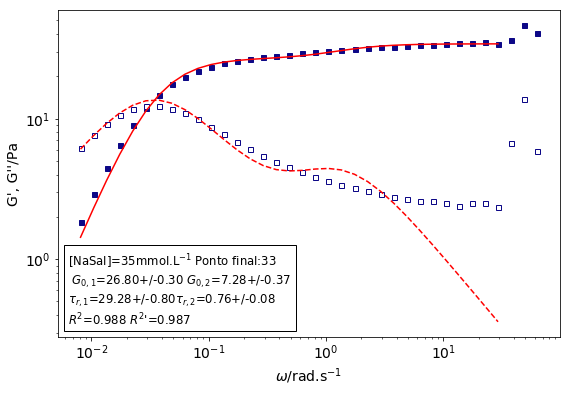

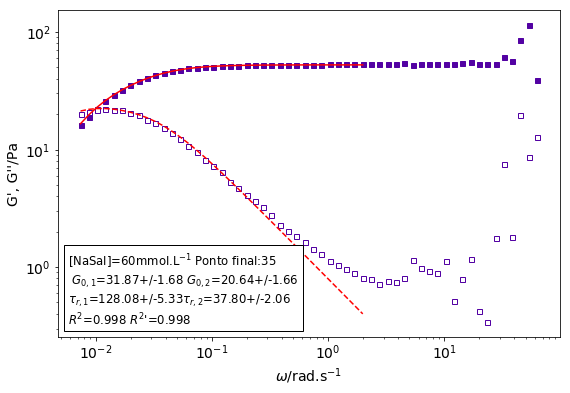

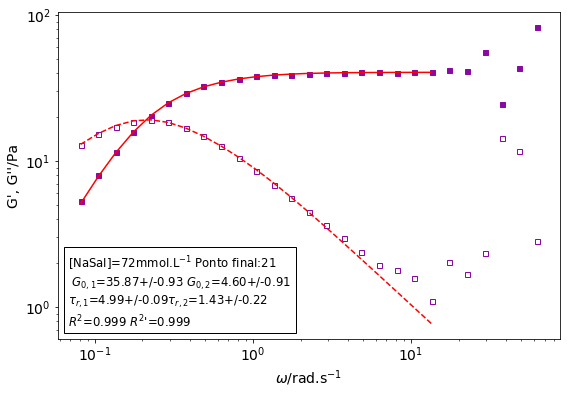

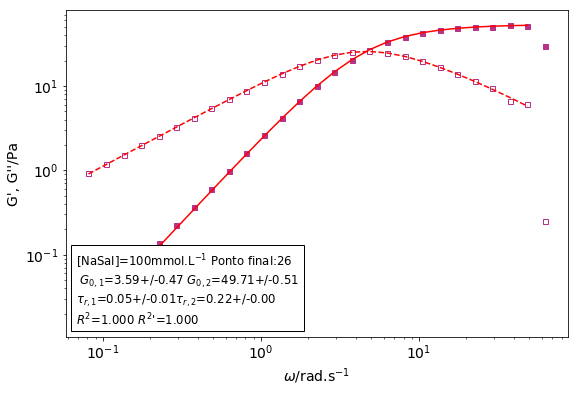

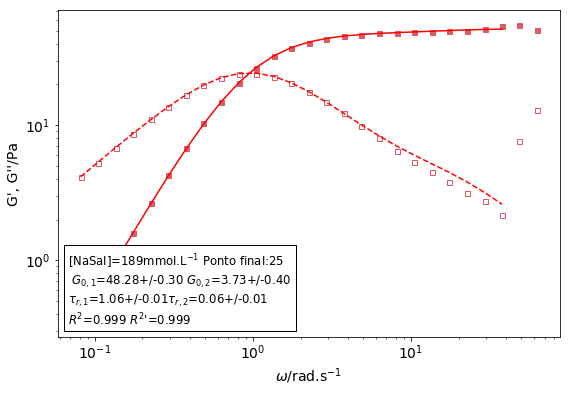

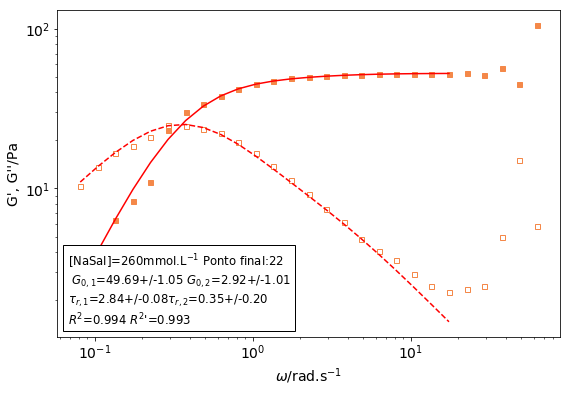

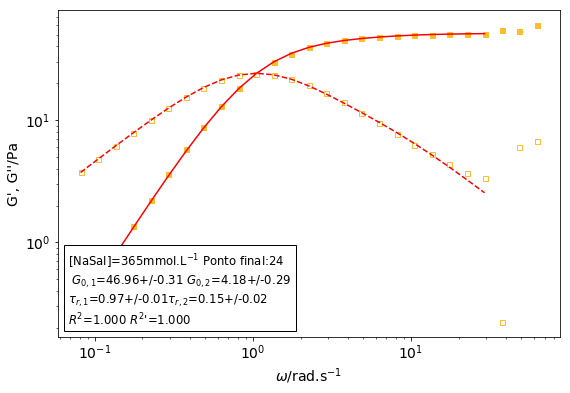

In [57]:
cores = plt.cm.plasma(np.arange(0, len(fbons))/len(fbons))
resultados_tm = []

with open('ajuste_tm.csv', 'w') as fhand:
    fhand.write('c;pto_final;g01;g01err;tr1;tr1err;g02;g02err;tr2;tr2err;R2;R2lin\n')

for file in fbons:
    temp_pd = pd.read_csv(file, encoding='utf8', delimiter=';', decimal=',')
    files_pd.append(temp_pd)
    
for i, file in enumerate(fbons):
    
    df = pd.read_csv(file, encoding='utf8', delimiter=';', decimal=',', names = ['w', 'G1', 'G2', 'T'], header=1)
    c = find_conc.search(file).group()
    
    final = ptos[c]
    
    dataset_x = df['w'].iloc[0:final]
    dataset_elast = df['G1'].iloc[0:final]
    dataset_visc = df['G2'].iloc[0:final]
#
    #datasets = [dataset_elast, dataset_visc]
    #fit = minimize( residual_oldroyd, params, args=(dataset_x, datasets) )
    fit = ajuste_two_mode(dataset_x, dataset_elast, dataset_visc)
    
    SStot_elast = sum((dataset_elast - np.mean(dataset_elast)) ** 2)
    SStot_visc = sum((dataset_visc - np.mean(dataset_visc)) ** 2)

    G01_fit = fit.params['G0_1']
    tr1_fit = fit.params['lambda1']
    G02_fit = fit.params['G0_2']
    tr2_fit = fit.params['lambda2']

    modelo_elast = two_mode_elast(dataset_x, G01_fit, G02_fit, tr1_fit, tr2_fit)
    modelo_visc = two_mode_visc(dataset_x, G01_fit, G02_fit, tr1_fit, tr2_fit)

    SSres = fit.chisqr
    SStot = SStot_elast + SStot_visc
    R2 = 1 - SSres / SStot
    
    MQres = SSres/(final - 4)
    MQTcor = SStot/(final - 1)
    R2lin = 1 - MQres/MQTcor

####################################
    
    fig, ax = plt.subplots(1, 1, figsize=(9,6))
    
    ax.set(xlabel=r'$\omega$/rad.s$^{-1}$', ylabel="G', G''/Pa", xscale='log', yscale='log')

    #l = ax.plot('w', 'G2', data=df, label= f"G''" + c, **padrao_osc, color=cores[i], markerfacecolor='w')
    #padrao_osc = {'linewidth':0, 'marker':'s', 'markersize':5}
    
    ax.plot(df['w'], df['G1'], **padrao_osc, color=cores[i], label='')
    ax.plot(df['w'], df['G2'], **padrao_osc, color=cores[i], markerfacecolor='w', label=c)
    ax.plot(dataset_x, modelo_elast, c='red')
    ax.plot(dataset_x, modelo_visc, 'r--')

    ax.set(xlabel=r'$\omega$/rad.s$^{-1}$', ylabel="G', G''/Pa", xscale='log', yscale='log')
    
    total_text= (
                rf'[NaSal]={c}' 
                 'mmol.L$^{-1}$ '
                rf'Ponto final:{final}'
                '\n' 
                r' $G_{0,1}$='
                rf'{G01_fit.value:.2f}+/-{G01_fit.stderr:.2f}'
                r' $G_{0,2}$='
                rf'{G02_fit.value:.2f}+/-{G02_fit.stderr:.2f}'
                '\n'
                r'$\tau_{r,1}$='
                rf'{tr1_fit.value:.2f}+/-{tr1_fit.stderr:.2f}'
                r'$\tau_{r,2}$'
                rf'={tr2_fit.value:.2f}+/-{tr2_fit.stderr:.2f}'
                '\n' 
                rf'$R^2$={R2:.3f} '
                rf"$R^2$'={R2lin:.3f}"  
                )

    anchored_text = AnchoredText(total_text, loc=3, frameon=True, prop={'fontsize':'small'})
    ax.add_artist(anchored_text)
    
    with open('ajuste_tm.csv', 'a') as fhand:
        fhand.write(
                rf'{c}'
                 ';'
                rf'{final}'
                ';' 
                rf'{G01_fit.value};{G01_fit.stderr}'
                ';'
                rf'{tr1_fit.value};{tr1_fit.stderr}'
                ';' 
                rf'{G02_fit.value};{G02_fit.stderr}'
                ';'
                rf'{tr2_fit.value};{tr2_fit.stderr}'
                ';' 
                rf'{R2:.3f}'
                ';'
                rf"{R2lin:.3f}"
                '\n'
        )
    
    resultado = resultado_ajuste(c, [G01_fit.value, tr1_fit.value, G02_fit.value, tr2_fit.value], 
                                 [G01_fit.stderr, tr1_fit.stderr, G02_fit.stderr, tr2_fit.stderr],
                                R2, R2lin)
    resultados_tm.append(resultado)

### Jeffreys

In [47]:
def ajuste_Jeffreys(w, G1, G2, chutes=[10,1,1]):
    """chutes: G0, lambda1, lambda2"""
    datasets = [G1, G2]
    params = Parameters()
    params.add('G0', chutes[0], vary=True, min=0)
    params.add('lambda1', chutes[1], vary=True, min=0)
    params.add('lambda2', chutes[2], vary=True, min=0)
    
    def residual_jeffreys(params, x, datasets):
        jeff_elast = jeffreys_elast2(x, params['G0'], params['lambda1'], params['lambda2'])
        jeff_visc  = jeffreys_visc2 (x, params['G0'], params['lambda1'], params['lambda2'])
        
        resid1 = datasets[0] - jeff_elast
        resid2 = datasets[1] - jeff_visc
        return np.concatenate((resid1, resid2))
    
    fit = minimize( residual_jeffreys, params, args=(w, datasets))
    return fit

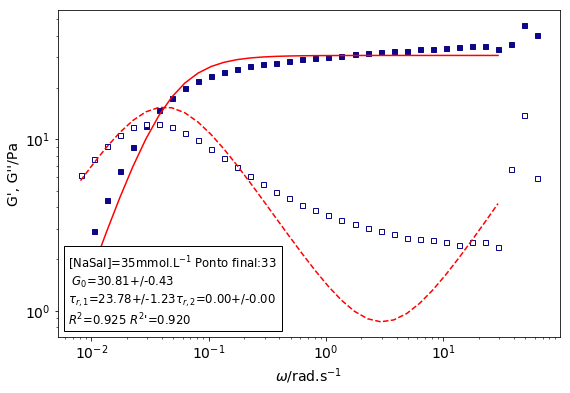

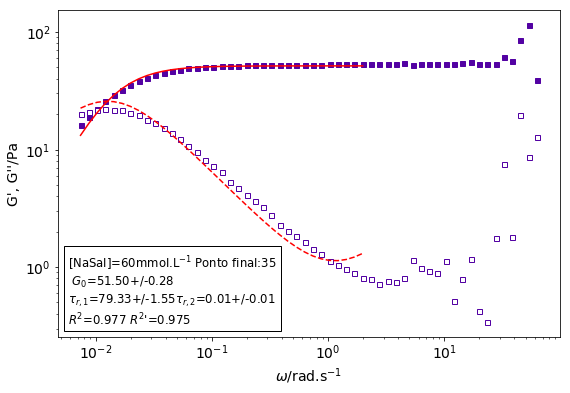

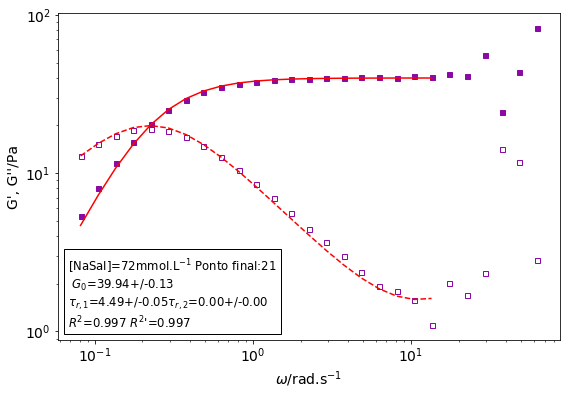

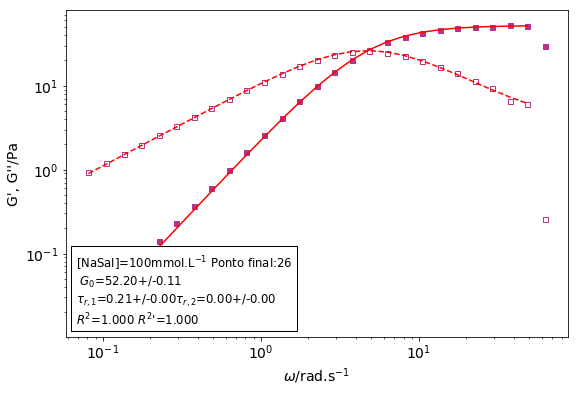

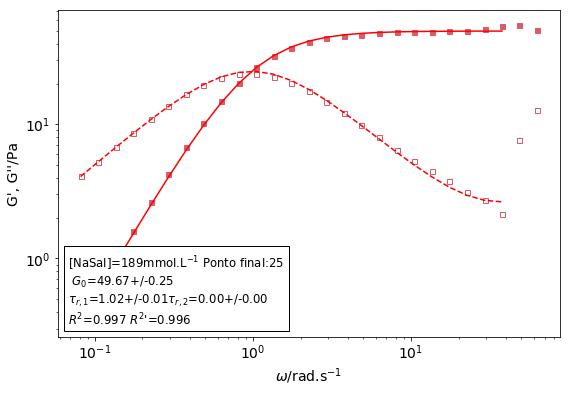

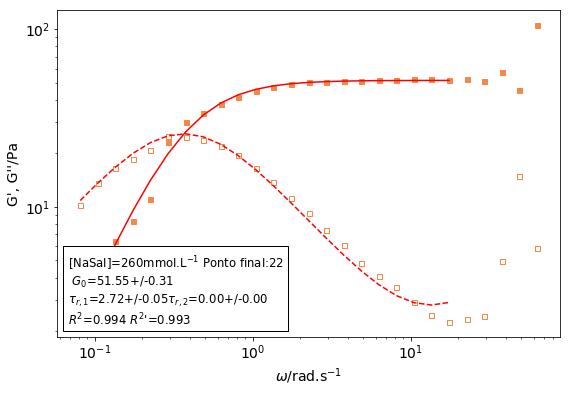

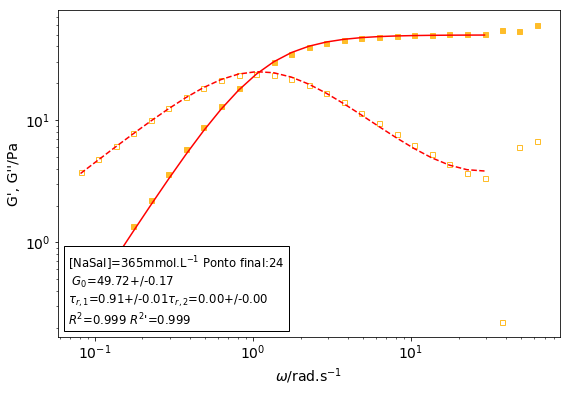

In [60]:
cores = plt.cm.plasma(np.arange(0, len(fbons))/len(fbons))
resultados_jef = []

with open('ajuste_jeffreys.csv', 'w') as fhand:
    fhand.write('c;pto_final;g0;g0err;tr1;tr1err;tr2;tr2err;R2;R2lin\n')

for file in fbons:
    temp_pd = pd.read_csv(file, encoding='utf8', delimiter=';', decimal=',')
    files_pd.append(temp_pd)
    
for i, file in enumerate(fbons):
    df = pd.read_csv(file, encoding='utf8', delimiter=';', decimal=',', 
                     names = ['w', 'G1', 'G2', 'T'], header=1)
    c = find_conc.search(file).group()
    
    final = ptos[c]
    
    dataset_x = df['w'].iloc[0:final]
    dataset_elast = df['G1'].iloc[0:final]
    dataset_visc = df['G2'].iloc[0:final]

    fit = ajuste_Jeffreys(dataset_x, dataset_elast, dataset_visc)
    
    SStot_elast = sum((dataset_elast - np.mean(dataset_elast)) ** 2)
    SStot_visc = sum((dataset_visc - np.mean(dataset_visc)) ** 2)

    G0_fit = fit.params['G0']
    tr1_fit = fit.params['lambda1']
    tr2_fit = fit.params['lambda2']

    modelo_elast = jeffreys_elast2(dataset_x, G0_fit, tr1_fit, tr2_fit)
    modelo_visc = jeffreys_visc2(dataset_x, G0_fit, tr1_fit, tr2_fit)

    SSres = fit.chisqr
    SStot = SStot_elast + SStot_visc
    R2 = 1 - SSres / SStot
    
    MQres = SSres/(final - 3)
    MQTcor = SStot/(final - 1)
    R2lin = 1 - MQres/MQTcor

    ####################################
    
    fig, ax = plt.subplots(1, 1, figsize=(9,6))
    
    ax.set(xlabel=r'$\omega$/rad.s$^{-1}$', ylabel="G', G''/Pa", xscale='log', yscale='log')

    #l = ax.plot('w', 'G2', data=df, label= f"G''" + c, **padrao_osc, color=cores[i], markerfacecolor='w')
    #padrao_osc = {'linewidth':0, 'marker':'s', 'markersize':5}
    
    ax.plot(df['w'], df['G1'], **padrao_osc, color=cores[i], label='')
    ax.plot(df['w'], df['G2'], **padrao_osc, color=cores[i], markerfacecolor='w', label=c)
    ax.plot(dataset_x, modelo_elast, c='red')
    ax.plot(dataset_x, modelo_visc, 'r--')

    ax.set(xlabel=r'$\omega$/rad.s$^{-1}$', ylabel="G', G''/Pa", xscale='log', yscale='log')
    
    total_text= (
                rf'[NaSal]={c}' 
                 'mmol.L$^{-1}$ '
                rf'Ponto final:{final}'
                '\n' 
                r' $G_{0}$='
                rf'{G0_fit.value:.2f}+/-{G0_fit.stderr:.2f}'
                '\n'
                r'$\tau_{r,1}$='
                rf'{tr1_fit.value:.2f}+/-{tr1_fit.stderr:.2f}'
                r'$\tau_{r,2}$'
                rf'={tr2_fit.value:.2f}+/-{tr2_fit.stderr:.2f}'
                '\n' 
                rf'$R^2$={R2:.3f} '
                rf"$R^2$'={R2lin:.3f}"
                )

    anchored_text = AnchoredText(total_text, loc=3, frameon=True, prop={'fontsize':'small'})
    ax.add_artist(anchored_text)
    
    with open('ajuste_jeffreys.csv', 'a') as fhand:
        fhand.write(
                rf'{c}'
                 ';'
                rf'{final}'
                ';' 
                rf'{G0_fit.value};{G0_fit.stderr}'
                ';'
                rf'{tr1_fit.value};{tr1_fit.stderr}'
                ';' 
                rf'{tr2_fit.value};{tr2_fit.stderr}'
                ';' 
                rf'{R2:.3f}'
                ';'
                rf"{R2lin:.3f}"
                '\n'
        )
    
    resultado = resultado_ajuste(c, [G0_fit.value, tr1_fit.value, tr2_fit.value], 
                                 [G01_fit.stderr, tr1_fit.stderr, tr2_fit.stderr],
                                R2, R2lin)
    resultados_jef.append(resultado)

# Plotando os resultados

## Carregando os resultados

In [73]:
resultados = glob.glob('ajuste*csv')
df_jeff = pd.read_csv('ajuste_jeffreys.csv', sep=';')
df_max = pd.read_csv('ajuste_maxwell.csv', sep=';')
df_old = pd.read_csv('ajuste_oldroyd.csv', sep=';')
df_tm = pd.read_csv('ajuste_tm.csv', sep=';')

print(df_max.columns)
print(df_old.columns)
print(df_jeff.columns)
print(df_tm.columns)

Index(['c', 'pto_final', 'g0', 'g0err', 'tr', 'trerr', 'R2', 'R2lin'], dtype='object')
Index(['c', 'pto_final', 'g0', 'g0err', 'tr', 'trerr', 'etainf', 'etainferr',
       'R2', 'R2lin'],
      dtype='object')
Index(['c', 'pto_final', 'g0', 'g0err', 'tr1', 'tr1err', 'tr2', 'tr2err', 'R2',
       'R2lin'],
      dtype='object')
Index(['c', 'pto_final', 'g01', 'g01err', 'tr1', 'tr1err', 'g02', 'g02err',
       'tr2', 'tr2err', 'R2', 'R2lin'],
      dtype='object')


## Plots comparativos tr1

C:\Users\Karl\Anaconda3\lib\site-packages\matplotlib\figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


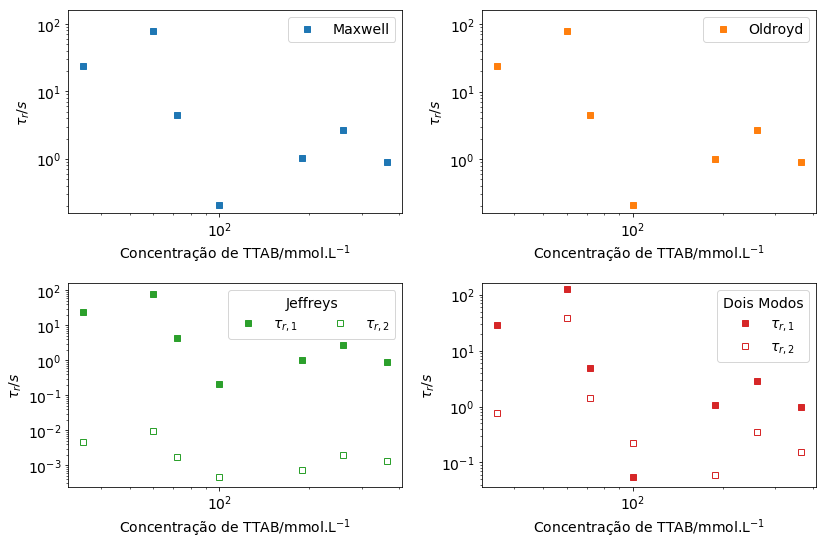

In [165]:
fig, ax = plt.subplots(2, 2, figsize=(9*1.3, 6*1.3))
alpha=1
ax = ax.flatten()
ax[0].plot(df_max['c'], df_max['tr'], linewidth=0, color='C0', marker='s', label='Maxwell', alpha=alpha)
ax[1].plot(df_old['c'], df_old['tr'], linewidth=0, color='C1', marker='s', label='Oldroyd', alpha=alpha)
ax[2].plot(df_jeff['c'], df_jeff['tr1'], linewidth=0, color='C2', marker='s', 
           label=r'$\tau_{r,1}$', alpha=alpha)
ax[2].plot(df_jeff['c'], df_jeff['tr2'], linewidth=0, color='C2', marker='s', 
           label=r'$\tau_{r,2}$', alpha=alpha, mfc='w')
ax[3].plot(df_tm['c'], df_tm['tr1'], linewidth=0, color='C3', marker='s', label=r'$\tau_{r,1}$', alpha=alpha)
ax[3].plot(df_tm['c'], df_tm['tr2'], linewidth=0, color='C3', marker='s', 
           label=r'$\tau_{r,2}$', alpha=alpha, mfc='w')

max_prop = max([i.get_ylim()[1] for i in ax])
min_prop = min([i.get_ylim()[0] for i in ax])

for i in ax:
    i.set(xscale='log', yscale='log', ylabel=r'$\tau_r/s$', 
          xlabel=r'Concentração de TTAB/mmol.L$^{-1}$')
    i.set_ylim(top=max_prop*1.2) #, bottom=10**min_prop)
    i.legend()

#fig.suptitle(r'$\tau_r$')

ax[3].legend(loc='upper right', title='Dois Modos')
ax[2].legend(loc='upper right', title='Jeffreys', ncol=2)
fig.set_tight_layout(True)

fig.savefig(r'../../../../reologia/oscilatório_agua_tr.pdf')

## Plots comparativos G01

C:\Users\Karl\Anaconda3\lib\site-packages\matplotlib\figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


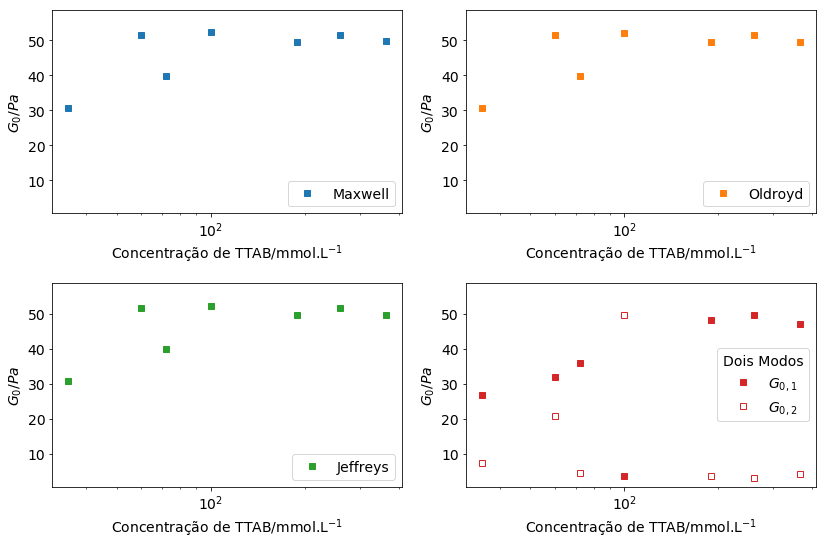

In [166]:
fig, ax = plt.subplots(2, 2, figsize=(9*1.3, 6*1.3))
alpha = 1

ax = ax.flatten()
ax[0].plot(df_max['c'], df_max['g0'], linewidth=0, color='C0', marker='s', label='Maxwell', alpha=alpha)
ax[1].plot(df_old['c'], df_old['g0'], linewidth=0, color='C1', marker='s', label='Oldroyd', alpha=alpha)
ax[2].plot(df_jeff['c'], df_jeff['g0'], linewidth=0, color='C2', 
           marker='s', label='Jeffreys', alpha=alpha)
ax[3].plot(df_tm['c'], df_tm['g01'], linewidth=0, color='C3', marker='s', label=r'$G_{0,1}$', alpha=alpha)
ax[3].plot(df_tm['c'], df_tm['g02'], linewidth=0, color='C3', marker='s', 
           label=r'$G_{0,2}$', alpha=alpha, mfc='w')

max_prop = max([i.get_ylim()[1] for i in ax])
min_prop = min([i.get_ylim()[0] for i in ax])
#print(max_prop)

for i in ax:
    i.set(xscale='log', ylabel=r'$G_0/Pa$', xlabel=r'Concentração de TTAB/mmol.L$^{-1}$')
    i.set_ylim(top=max_prop*1.1, bottom=min_prop)
    i.legend(loc='lower right')

#fig.suptitle(r'$\tau_r$')
fig.set_tight_layout(True)
ax[3].legend(loc='center right', title='Dois Modos')

fig.savefig(r'../../../../reologia/oscilatório_agua_G0.pdf')

## Plots comparativos $R^2$

C:\Users\Karl\Anaconda3\lib\site-packages\matplotlib\figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


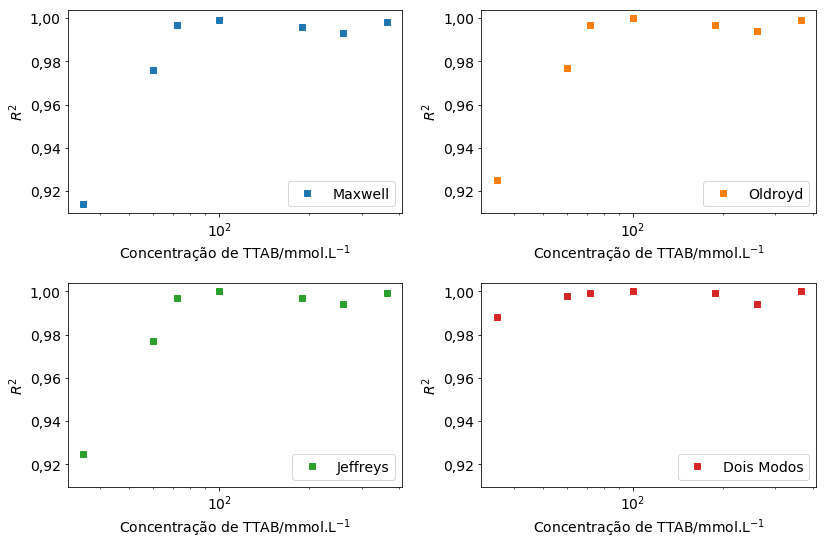

In [167]:
fig, ax = plt.subplots(2, 2, figsize=(9*1.3, 6*1.3))
ax = ax.flatten()
alpha=1
ax[0].plot(df_max['c'], df_max['R2'], linewidth=0, color='C0', marker='s', label='Maxwell', alpha=alpha)
ax[1].plot(df_old['c'], df_old['R2'], linewidth=0, color='C1', marker='s', label='Oldroyd', alpha=alpha)
ax[2].plot(df_jeff['c'], df_jeff['R2'], linewidth=0, color='C2', marker='s', label='Jeffreys', alpha=alpha)
ax[3].plot(df_tm['c'], df_tm['R2'], linewidth=0, color='C3', marker='s', label='Dois Modos', alpha=alpha)

max_prop = max([i.get_ylim()[1] for i in ax])
min_prop = min([i.get_ylim()[0] for i in ax])
#print(max_prop)

for i in ax:
    i.set(xscale='log', ylabel=r'$R^2$', xlabel=r'Concentração de TTAB/mmol.L$^{-1}$')
    i.set_ylim(top=max_prop, bottom=min_prop)
    i.legend(loc='lower right')

#fig.suptitle(r'$\tau_r$')
fig.set_tight_layout(True)

fig.savefig(r'../../../../reologia/oscilatório_agua_R2.pdf')

## Plots comparativos $R^{2'}$

C:\Users\Karl\Anaconda3\lib\site-packages\matplotlib\figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


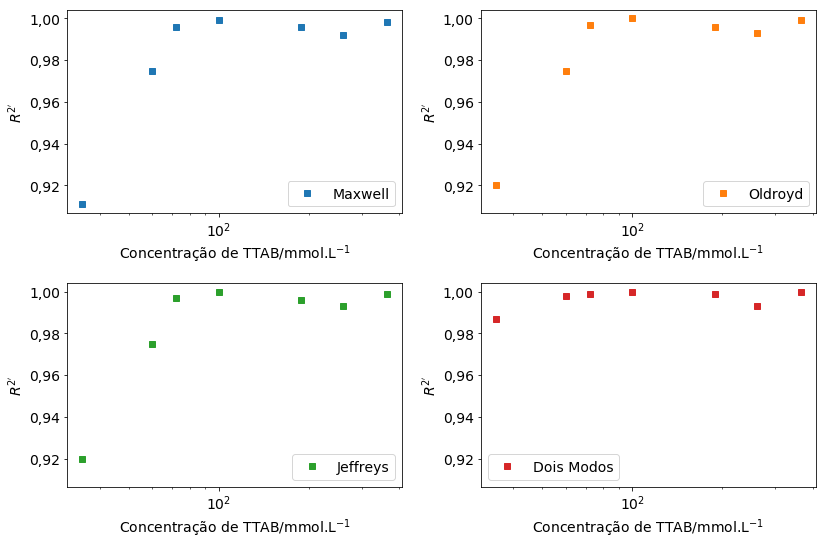

In [111]:
fig, ax = plt.subplots(2, 2, figsize=(9*1.3, 6*1.3))
alpha=1
ax = ax.flatten()
ax[0].plot(df_max['c'], df_max['R2lin'], linewidth=0, color='C0', marker='s', label='Maxwell', alpha=alpha)
ax[1].plot(df_old['c'], df_old['R2lin'], linewidth=0, color='C1', marker='s', label='Oldroyd', alpha=alpha)
ax[2].plot(df_jeff['c'], df_jeff['R2lin'], linewidth=0, color='C2', marker='s', label='Jeffreys', alpha=alpha)
ax[3].plot(df_tm['c'], df_tm['R2lin'], linewidth=0, color='C3', marker='s', label='Dois Modos', alpha=alpha)

max_prop = max([i.get_ylim()[1] for i in ax])
min_prop = min([i.get_ylim()[0] for i in ax])
#print(max_prop)

for i in ax:
    i.set(xscale='log', ylabel=r"$R^{2'}$", xlabel=r'Concentração de TTAB/mmol.L$^{-1}$')
    i.set_ylim(top=max_prop, bottom=min_prop)
    i.legend()

#fig.suptitle(r'$\tau_r$')
fig.set_tight_layout(True)

# Montando tabelas

In [112]:
print(df_max.columns)
print(df_old.columns)
print(df_jeff.columns)
print(df_tm.columns)

Index(['c', 'pto_final', 'g0', 'g0err', 'tr', 'trerr', 'R2', 'R2lin'], dtype='object')
Index(['c', 'pto_final', 'g0', 'g0err', 'tr', 'trerr', 'etainf', 'etainferr',
       'R2', 'R2lin'],
      dtype='object')
Index(['c', 'pto_final', 'g0', 'g0err', 'tr1', 'tr1err', 'tr2', 'tr2err', 'R2',
       'R2lin'],
      dtype='object')
Index(['c', 'pto_final', 'g01', 'g01err', 'tr1', 'tr1err', 'g02', 'g02err',
       'tr2', 'tr2err', 'R2', 'R2lin'],
      dtype='object')


## $R^2$

In [131]:
tab_r2 = pd.concat([df_max['R2'], df_old['R2'], df_jeff['R2'], df_tm['R2']], axis=1)
tab_r2.index = df_max['c']

tab_r2.columns = ['Maxwell', 'OldroydB', 'Jeffreys', 'Dois Modos']
tab_r2.to_csv('tabela_r2.csv', sep=';')

## $R^{2'}$

In [130]:
tab_r2lin = pd.concat([df_max['R2lin'], df_old['R2lin'], df_jeff['R2lin'], df_tm['R2lin']], axis=1)
tab_r2lin.index = df_max['c']

tab_r2lin.columns = ['Maxwell', 'OldroydB', 'Jeffreys', 'Dois Modos']
tab_r2lin.to_csv('tabela_r2lin.csv', sep=';')

## $\tau_r$

In [129]:
tab_tr = pd.concat([df_max['tr'], df_old['tr'], df_jeff['tr1'], df_tm['tr1']], axis=1)
tab_tr.index = df_max['c']

tab_tr.columns = ['Maxwell', 'OldroydB', 'Jeffreys', 'Dois Modos']
tab_tr.to_csv('tabela_tr.csv', sep=';')

## $G_0$

In [128]:
tab_g0 = pd.concat([df_max['g0'], df_old['g0'], df_jeff['g0'], df_tm['g01']], axis=1)
tab_g0.index = df_max['c']

tab_g0.columns = ['Maxwell', 'OldroydB', 'Jeffreys', 'Dois Modos']
tab_g0.to_csv('tabela_g0.csv', sep=';')